In [1]:
import pandas as pd
import numpy as np
import os

# os.chdir(r"C:\Users\hkit\PycharmProjects\e_commerce\[20230620]RNN모델")

In [2]:
encoding = "UTF-8"  # "cp949" # "euc-kr"  # "ANSI"  # "ascii"

with open("0.txt", encoding=encoding) as f: a = f.read()
with open("1.txt", encoding=encoding) as f: b = f.read()
with open("1_.txt", encoding=encoding) as f: c = f.read()
with open(r"new_쇼핑.txt", encoding=encoding) as f: d = f.read()

In [3]:
import random
import numpy as np
import pandas as pd

e = [(i, 0) for i in a.split("\n")[:-1]]  # 일상
f = [(i, 1) for i in b.split("\n")[:-1]]  # 스팸
g = [(i, 1) for i in c.split("\n")[:-1]]  # 스팸
h = [(i, 0) for i in d.split("\n")[:-1]]  # 일상

# data = e + f + g + h
data = e + f + g + h
random.shuffle(data)

In [4]:
X = [i[0] for i in data]
y = np.array([i[1] for i in data])

In [5]:
pd.Series(y).value_counts()
# X_len.sort_values(ascending=False)
# len(X[50].split(" "))

0    2188
1     228
Name: count, dtype: int64

In [6]:
df = pd.DataFrame({"document": X, "label": y})

In [7]:
MAX_LEN = 1000
TRUNC = "pre"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target =\
    train_test_split(df["document"], df["label"], test_size=0.4, stratify=df["label"])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_input)

train_sequences = tokenizer.texts_to_sequences(train_input)
train_seq = pad_sequences(train_sequences, maxlen=MAX_LEN, truncating=TRUNC)
val_sequences = tokenizer.texts_to_sequences(val_input)
val_seq = pad_sequences(val_sequences, maxlen=MAX_LEN, truncating=TRUNC)

In [47]:
import tensorflow as tf

model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Embedding(input_dim=50000, output_dim=64, input_length=MAX_LEN))
# model2.add(tf.keras.layers.SimpleRNN(1, return_sequences=True))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(2, return_sequences=True)))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(2, return_sequences=False)))
model2.add(tf.keras.layers.Dropout(rate=0.3))
model2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model2.fit(train_seq, train_target, epochs=50, batch_size=32, validation_data=(val_seq, val_target))

Epoch 1/50
46/46 [==============================] - 19s 294ms/step - loss: 0.5785 - accuracy: 0.8910 - val_loss: 0.4374 - val_accuracy: 0.9152
Epoch 2/50
46/46 [==============================] - 12s 271ms/step - loss: 0.3917 - accuracy: 0.9331 - val_loss: 0.3187 - val_accuracy: 0.9152
Epoch 3/50
46/46 [==============================] - 11s 249ms/step - loss: 0.3224 - accuracy: 0.9241 - val_loss: 0.2751 - val_accuracy: 0.9173
Epoch 4/50
46/46 [==============================] - 11s 233ms/step - loss: 0.2896 - accuracy: 0.9365 - val_loss: 0.2465 - val_accuracy: 0.9183
Epoch 5/50
46/46 [==============================] - 11s 246ms/step - loss: 0.2685 - accuracy: 0.9400 - val_loss: 0.2247 - val_accuracy: 0.9183
Epoch 6/50
46/46 [==============================] - 11s 241ms/step - loss: 0.2521 - accuracy: 0.9317 - val_loss: 0.2090 - val_accuracy: 0.9183
Epoch 7/50
46/46 [==============================] - 11s 238ms/step - loss: 0.2373 - accuracy: 0.9303 - val_loss: 0.1967 - val_accuracy: 0.9183

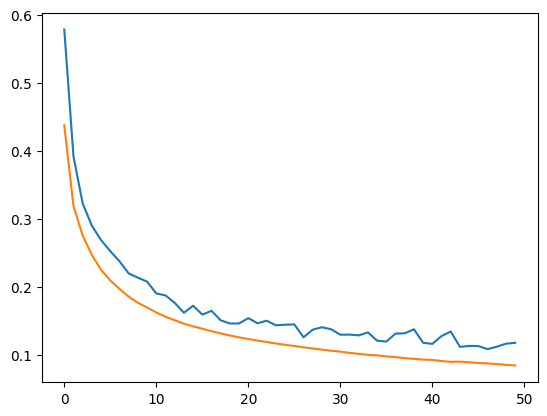

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

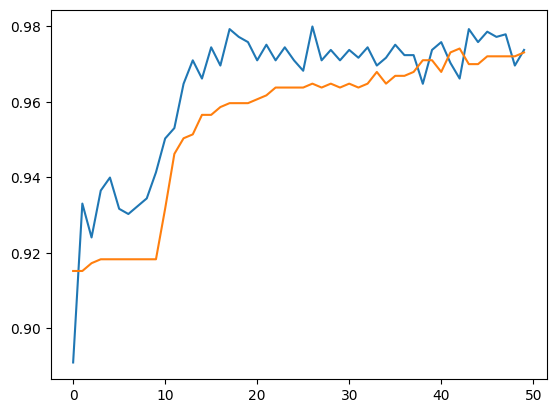

In [49]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [50]:
y[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [95]:
i = 18
sample_text = X[i]

real_sequences = tokenizer.texts_to_sequences([sample_text])
real_seq = pad_sequences(real_sequences, maxlen=MAX_LEN, truncating=TRUNC)
result = model2.predict(real_seq)
print(X[i])
print(result)

1/1 [==============================] - 0s 86ms/step
여보세요? 여보세요? 예. 예 지금 대출 네네 보증선다고 했는데 보증을 서신다고 하셨다고요? 네, 보증을 선다고 했는데 보증이 만약에 보증이 안되요. 네네. 안된다고 담당자한테 했어요 에예 근데 이제 그 거기서 기록이 남을수 있고 불이익이 갈수 있다고 얘기를 했거든요. 지금 전화하는 이곳에서 저희쪽에서요? 네네. 네. 이게 맞는건가요? 뭐 지금 서류를 저희한테 보내주시고 서류보낸적 없어요. 그러면 저희가 안남죠. 그쵸. 네네. 근데 그 지금 아까 이 번호로 전화오신 여자분은 왜 남는다고 저한테 막 협박성으로 얘기해요? 어떤분이 그러셨는데요? 이름은 모르겠는데 네 이 번호로 연락 핸드폰 번호 어떻게 되세요 쟤 핸드폰 번호요? 아니요, 그 쪽 뭐 그 산와머니 번호 지금 번호로 전화왔어요. 이번호 이 번호로 전화오셨다고요? 예 제가 건 이 번호 음… 잠시만요. 근데 거기 어디에요? 저기 중개업체에요 중계업체라고요? 네네네. 아까전에 전화했을때는 신한금융이라고 하던데. 뭐 신한 은행이나 신한 캐피탈이랑 저축 은행 쪽으로 네네 네 네 그쪽으로 저희가 중개를 해드리고 있어요 그럼 아까 전화받는데 신한은행이 아니네요. 신한금융이라고 통화를 하죠. 성북지점이에요? 거기가? 네네네. 네네. 정확히 상호명이 신한금융인거에요? 중개 업체라고 생각해 주시면 되세요 
[[0.5812156]]


In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
y_hat = model2.predict(pad_sequences(tokenizer.texts_to_sequences(val_input), maxlen=MAX_LEN, truncating=TRUNC))

31/31 [==============================] - 1s 21ms/step


In [96]:
threshold = 0.35

y_hat_final = []
for i in y_hat:
    if i > threshold:
        y_hat_final.append(1.0)
    else:
        y_hat_final.append(0.0)

confusion_matrix(val_target, y_hat_final)

array([[874,   2],
       [  7,  84]])

In [67]:
import pickle as pk

with open("model.pickle", "wb") as f:
    pk.dump(model2, f)

In [68]:
with open("tokenizer.pickle", "wb") as f:
    pk.dump(tokenizer, f)

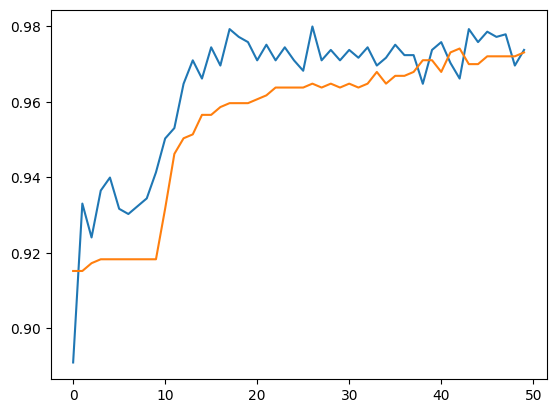

In [97]:
import matplotlib.pyplot as plt

# plt.plot(history.history["accuracy"])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

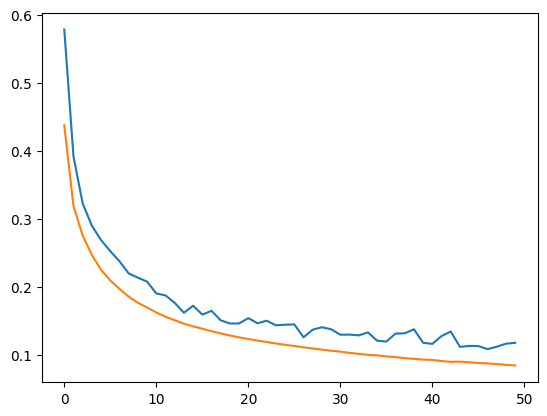

In [98]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 1000
TRUNC = "pre"

import pickle as pk
import time


with open("./model_Bi-LSTM.pickle", "rb") as f:
    model = pk.load(f)


with open("./tokenizer.pickle", "rb") as f:
    tokenizer = pk.load(f)

start_time = time.time()

with open("./보이스피싱-예시사례 - 복사본.txt", encoding="utf-8") as f:
    text = f.read()

real_sequences = tokenizer.texts_to_sequences([text])
real_seq = pad_sequences(real_sequences, maxlen=MAX_LEN, truncating=TRUNC)
result = model.predict(real_seq)
print(text)
print(result)

end_time = time.time()
print(end_time - start_time)

1/1 [==============================] - 1s 1s/step
여보세요? 여보세요 혹시 000맞으십니까? 네 맞는데요 누구시죠? 여기는 서울중앙검찰청인데요 혹시 000이라고 아시는 분이예요? 아뇨 모르는데요? 아 그러시구나 저희가 000을 대포통장관련으로 사기혐의를 받고 있어서 검거를 했는데 000이 나와서 조사를 하고 있어요 혹시 최근 한 3년안에 통장개설하신 적이 있나요? 아뇨 없는데요 여기는 농협에서 개설한 이력이 나오는데 아닌가요? 아 있는 것 같아요 근데 농협이라고요? 네 농협이라고 하는데 똑바로 대답해 주세요 이거 큰 건이라 잘 못 대답할시 당신이 구속이 될 수 있는 상황이라고요 아뇨 저는 신협에서 했는데요 진짜 서울검찰청 맞아요? 맞다고요 증명서 보내드려요? 네 보내줘봐요 보냈는데 확인해보세요 확인해보셨어요? 이제 믿으시겠어요? 저희가 무작정 잡으라고 하면 잡아갈 수 있지만 당신 억울한 상황이 되지말라고 조사를 하고 있는거라고요 그러니 협조를 잘 해 주셔야 저희도 엄한 사람을 안잡고 서로 편하지 않겠어요? 네 저는 농협에서 통장을 개설한 적이 없어요 그럼 그 사람이 당신의 개인정보를 어디서 빼와서 개설을 한 것 같은데 그럼 주로 쓰는 은행은 어딥니까? 저는 대구은행을 주로 쓰고 있어요 아니다 요즘 기업은행으로 바꿨어요 말바꾸시지 말고 똑바로 대답해 주세요 이거 다 녹음이 되고 있어서 잘못 이야기하면 우리도 판별하기 어려워요기업은행 확실해요? 네 맞아요 그럼 본인통장이 맞는지 확인하기 위해 계좌번호가 뭔지 알려줘봐요그건 왜요?이 사람아 아직도 구분이 안되나본데 당신 개인정보가 노출이 되어서 범죄에 연루가 되었다고 본인확인하고 진짜 억울한지 확인을 해야 그걸 풀 수 있다니까?이거 아무래도 보이스피싱 같은데 마음대로 생각해 우리는 당신 범죄사실이 확인되었다고 영장발부하고 잡으면 끝이니까 그래요 그러면 법정에서 한번 봅시다
[[0.57110125]]
1.2316341400146484
